# EDA - Exploratory Data Analysis

Input - a corpus and document-term matrix

EDA - summarise the main characteristics of a dataset often using visualisation

Output - figure out the main trends in the data and see if it makes sense

EDA Steps:
1. Data - determine format of the raw data we need
2. Aggregate - how to aggregate the data
3. Visualise - find best way to do this to the data
4. Insights - extract some key takeaways from the visualisations

### Things we can look for:

- Top words by each user
- Vocabulary/num of unique words used
- Profanity count

Top words:
- Corpus or document term matrix?? Definitely the DTM

Aggregate the data to find the top words - for each user select the columns with the largest values

Visualize:
- word clouds
- bar plot etc

In [58]:
import pandas as pd
import pickle
data = pd.read_pickle("document_term_matrix.pkl")
data = data.transpose() # flips the dataframe - this makes the aggregations easier...its harder to do things across rows than it is across columns
data.head

<bound method NDFrame.head of         0   1   2   3   4   5   6   7   8   9   ...  45  46  47  48  49  50  \
10       0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
11       0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
12       0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
13       0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
14       0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
union    0   0   0   1   0   0   0   0   0   0  ...   0   0   1   0   0   0   
update   0   0   0   1   0   0   0   0   0   0  ...   0   0   1   0   0   0   
video    0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   1   
wall     1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
wrote    0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   

        51  52  53  5

### Get the most used words per user

In [59]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index, top.values))
    
top_dict

{0: [('rt', 2),
  ('annual', 1),
  ('seiyuu', 1),
  ('ceo', 1),
  ('counc', 1),
  ('dtype', 1),
  ('greta', 1),
  ('journal', 1),
  ('kon', 1),
  ('krizshillz', 1),
  ('apehotsprings', 1),
  ('minting', 1),
  ('nahuelmuty', 1),
  ('object', 1),
  ('aikos', 1),
  ('thunberg', 1),
  ('wall', 1),
  ('slovakia', 1),
  ('speeding', 1),
  ('street', 1),
  ('temporada', 1),
  ('shot', 0),
  ('emissions', 0),
  ('emiss', 0),
  ('update', 0),
  ('decades', 0),
  ('counte', 0),
  ('european', 0),
  ('video', 0),
  ('coun', 0)],
 1: [('apehotsprings', 1),
  ('decades', 1),
  ('greta', 1),
  ('nahuelmuty', 1),
  ('object', 1),
  ('rt', 1),
  ('dtype', 1),
  ('krizshillz', 1),
  ('thunberg', 1),
  ('counte', 0),
  ('journal', 0),
  ('helicopter', 0),
  ('ceo', 0),
  ('clima', 0),
  ('co2', 0),
  ('global', 0),
  ('fuel', 0),
  ('coun', 0),
  ('fossil', 0),
  ('fo', 0),
  ('european', 0),
  ('kon', 0),
  ('emissions', 0),
  ('emiss', 0),
  ('counc', 0),
  ('essay', 0),
  ('10', 0),
  ('makes', 0),
 

## Separate by user

In [60]:
for user, top_words in top_dict.items():
    print(user)
    print(", ".join([word for word, count in top_words[0:20]]))
    print("===")

0
rt, annual, seiyuu, ceo, counc, dtype, greta, journal, kon, krizshillz, apehotsprings, minting, nahuelmuty, object, aikos, thunberg, wall, slovakia, speeding, street
===
1
apehotsprings, decades, greta, nahuelmuty, object, rt, dtype, krizshillz, thunberg, counte, journal, helicopter, ceo, clima, co2, global, fuel, coun, fossil, fo
===
2
apehotsprings, dtype, greta, nahuelmuty, object, fuel, fossil, emissions, total, thunberg, co2, krizshillz, emiss, kon, essay, european, fo, counte, coun, global
===
3
apehotsprings, thunberg, greta, nahuelmuty, object, european, dtype, emiss, krizshillz, update, union, fossil, helicopter, ceo, global, clima, fuel, coun, counc, essay
===
4
apehotsprings, talk, greta, nahuelmuty, object, rt, dtype, krizshillz, thunberg, clima, counte, helicopter, ceo, global, co2, fuel, fossil, coun, fo, european
===
5
south, afri, krizshillz, greta, apehotsprings, thunberg, nahuelmuty, object, dtype, rt, european, global, fuel, fossil, fo, 10, essay, journal, emission

### Remove commonly used words

Some words are not stopwords but used too much to be meaningul in the data.

In [61]:
from collections import Counter

words = []
for user in data.columns:
    top = [word for (word, count) in top_dict[user]]
    for t in top:
        words.append(t)
        
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words.append("RT")
words

['rt',
 'annual',
 'seiyuu',
 'ceo',
 'counc',
 'dtype',
 'greta',
 'journal',
 'kon',
 'krizshillz',
 'apehotsprings',
 'minting',
 'nahuelmuty',
 'object',
 'aikos',
 'thunberg',
 'wall',
 'slovakia',
 'speeding',
 'street',
 'temporada',
 'shot',
 'emissions',
 'emiss',
 'update',
 'decades',
 'counte',
 'european',
 'video',
 'coun',
 'apehotsprings',
 'decades',
 'greta',
 'nahuelmuty',
 'object',
 'rt',
 'dtype',
 'krizshillz',
 'thunberg',
 'counte',
 'journal',
 'helicopter',
 'ceo',
 'clima',
 'co2',
 'global',
 'fuel',
 'coun',
 'fossil',
 'fo',
 'european',
 'kon',
 'emissions',
 'emiss',
 'counc',
 'essay',
 '10',
 'makes',
 '11',
 'wall',
 'apehotsprings',
 'dtype',
 'greta',
 'nahuelmuty',
 'object',
 'fuel',
 'fossil',
 'emissions',
 'total',
 'thunberg',
 'co2',
 'krizshillz',
 'emiss',
 'kon',
 'essay',
 'european',
 'fo',
 'counte',
 'coun',
 'global',
 'decades',
 'clima',
 'ceo',
 'helicopter',
 'journal',
 'counc',
 '10',
 'makes',
 '11',
 'wall',
 'apehotsprings',

In [62]:
# aggregate the list and identify the most common words along with how many posts they are in
Counter(words).most_common()

[('counc', 55),
 ('dtype', 55),
 ('greta', 55),
 ('krizshillz', 55),
 ('apehotsprings', 55),
 ('nahuelmuty', 55),
 ('object', 55),
 ('thunberg', 55),
 ('emissions', 55),
 ('emiss', 55),
 ('decades', 55),
 ('counte', 55),
 ('european', 55),
 ('coun', 55),
 ('clima', 54),
 ('co2', 54),
 ('global', 54),
 ('fuel', 54),
 ('fossil', 54),
 ('fo', 54),
 ('essay', 54),
 ('journal', 53),
 ('helicopter', 53),
 ('10', 49),
 ('kon', 47),
 ('rt', 40),
 ('RT', 37),
 ('million', 25),
 ('makes', 23),
 ('struggling', 23),
 ('minting', 21),
 ('wall', 12),
 ('street', 12),
 ('ceo', 10),
 ('speeding', 9),
 ('update', 8),
 ('video', 8),
 ('union', 7),
 ('shot', 6),
 ('26', 6),
 ('slovakia', 5),
 ('total', 5),
 ('talk', 5),
 ('south', 5),
 ('afri', 5),
 ('people', 5),
 ('wrote', 5),
 ('peake', 5),
 ('11', 4),
 ('annual', 1),
 ('seiyuu', 1),
 ('aikos', 1),
 ('temporada', 1),
 ('12', 1),
 ('13', 1),
 ('14', 1),
 ('15', 1),
 ('16', 1),
 ('17', 1),
 ('18', 1),
 ('19', 1),
 ('20', 1),
 ('21', 1),
 ('22', 1),
 ('2

In [63]:
# add stop words if too many users use the word (in this case if all 5 - length of data.colums ie number of columns/users)

add_stop_words = [word for word, count in Counter(words).most_common() if count >= len(data.columns)]
add_stop_words

['counc',
 'dtype',
 'greta',
 'krizshillz',
 'apehotsprings',
 'nahuelmuty',
 'object',
 'thunberg',
 'emissions',
 'emiss',
 'decades',
 'counte',
 'european',
 'coun']

In [64]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

data_clean = pd.read_pickle("Cleaned_corpus.pkl")

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words) # adds the new stop word list

# recreate the DTM
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean) # the cleaned tweets (which we saved over the original df hence its still just called df)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names()) # converts to an array and labels the columns
data_stop.index = data_clean.index
data_stop

/home/main/Documents/Main/Code/Python/Data/project_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,11,12,13,14,15,16,17,18,19,...,street,struggling,talk,temporada,total,union,update,video,wall,wrote
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# save it as a pickle file
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

## Visualizing the data

First using wordclouds

In [66]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

ValueError: num must be 1 <= num <= 12, not 13

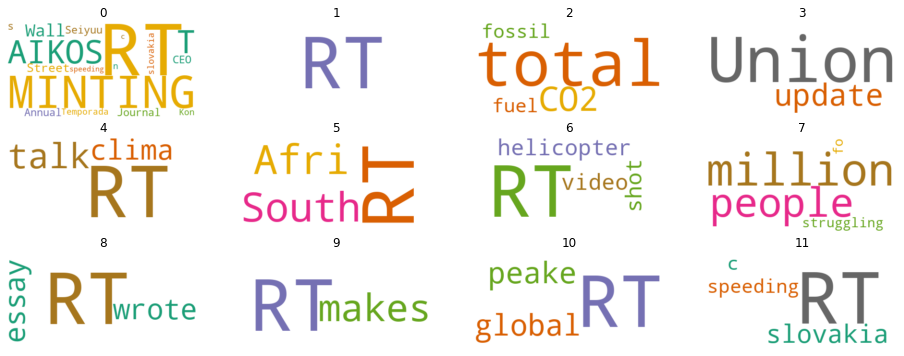

In [67]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16,6]

for index, user in enumerate(data.columns):
    wc.generate(data_clean[user])
    
    plt.subplot(3,4,index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(user)
    
plt.show()

# Vocabulary analysis

Counting the number of unique words used by individuals

Using np nonzero as the standard nonzero didn't work

In [68]:
import numpy as np
unique_list = []
print(data.head())
for user in data.columns:
    # print(data[user])
    uniques = np.count_nonzero(np.array(data[user]))
    unique_list.append(uniques)
print(unique_list)

    0   1   2   3   4   5   6   7   8   9   ...  45  46  47  48  49  50  51  \
10   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
11   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
12   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
13   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
14   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

    52  53  54  
10   0   0   0  
11   0   0   0  
12   0   0   0  
13   0   0   0  
14   0   0   0  

[5 rows x 55 columns]
[21, 9, 12, 11, 10, 10, 11, 12, 11, 10, 12, 11, 10, 13, 12, 11, 11, 12, 13, 12, 11, 12, 11, 10, 13, 12, 11, 11, 12, 13, 12, 11, 12, 11, 10, 13, 12, 11, 11, 12, 13, 12, 11, 12, 11, 10, 13, 12, 11, 11, 12, 13, 12, 11, 12]


Put this into a dataframe

In [ ]:
data_words = pd.DataFrame(list(zip(data.columns, unique_list)), columns=['user','vocabulary'])
data_unique_sort = data_words.sort_values(by="vocabulary", ascending=False)
data_unique_sort

,user,vocabulary
0,0,21
40,40,13
18,18,13
29,29,13
13,13,13
35,35,13
24,24,13
46,46,13
51,51,13
43,43,12


### Visualize vocabulary

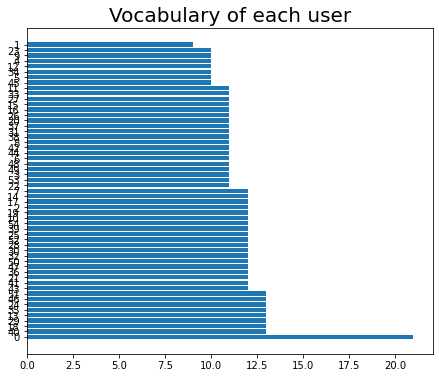

In [ ]:
y_pos = np.arange(len(data_words))

plt.subplot(1,2,1)
plt.barh(y_pos, data_unique_sort.vocabulary, align="center")
plt.yticks(y_pos, data_unique_sort.user)
plt.title("Vocabulary of each user", fontsize=20)
# plt.tight_layout()
plt.show()